# Things to explore:
Formulate hypthesis and test it accordinly.


1. Check correlation between different features. Will it make sense to eliminate the redundant features having strong correlations?e.g. physical health and gen health.

2. what are the top 3 deciding features? How does the model works with just these 3 features vs all 21 features?

3. Try different methods to find out 3 top features.

4. Will creating balanced dataset yield any different results for the model accuracy?

5. What other different models can we implement?

6. Look for existing research in diabetes field and what questions do they answer. Can we think of any alternative ways to test?

#Reference
https://www.cdc.gov/pcd/issues/2019/19_0109.htm


Read this paper and try to think of couple of questions that we need to answer as a part of this project.

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


drive.mount('/content/gdrive')

Mounted at /content/gdrive


Reading data

In [ ]:
df_2015 = pd.read_csv("/content/gdrive/MyDrive/Diabetes Project/2015.csv")
# print(df_2015.head())

Taking only required columns

# 2015

In [ ]:
df_2015_selected = df_2015[['DIABETE3',
                            # '_RFHYPE5',
                           # 'TOLDHI2',
                            '_BMI5',
                           # 'SMOKE100',
                           # 'CVDSTRK3',
                           # '_MICHD',
                           # '_TOTINDA',
                           # '_RFDRHV5',
                           'MENTHLTH',
                           # 'PHYSHLTH',
                           # 'ADDEPEV2',
                           # 'EXERANY2',
                            'GENHLTH'
                           # 'SEX',
                           # '_AGEG5YR',
                           # 'INCOME2',
                           #  'CHCKIDNY'
                            ]]


#Rename the columns to make them more readable
renamed_df_2015 = df_2015_selected.rename(columns = {'DIABETE3':'Diabetes',
                                        #  '_RFHYPE5':'High_BP',
                                        #  'TOLDHI2':'High_Cholestrol',
                                         '_BMI5':'BMI',
                                        #  'SMOKE100':'Smoker',
                                        #  'CVDSTRK3':'Stroke',
                                        #  '_MICHD':'Heart_Disease',
                                        #  '_TOTINDA':'Physical_Activity',
                                        #  '_RFDRHV5':'Heavy_Alcohol_Consumption',
                                         'MENTHLTH':'Mental_Health',
                                        #  'PHYSHLTH':'Physical_Health',
                                        #  'ADDEPEV2': 'Depression',
                                        #  'EXERANY2': 'Exercise',
                                         'GENHLTH':'General_Health',
                                        #  'SEX':'Sex',
                                        #  '_AGEG5YR':'Age',
                                        #  'INCOME2':'Income',
                                        #  'DECIDE': 'Decision',
                                        #  'CHCKIDNY': 'Kidney_Disease'
                                         })

renamed_df_2015.dropna(inplace=True)
renamed_df_2015.head()

print(renamed_df_2015.shape)


(405049, 4)


In [ ]:
print(renamed_df_2015.columns)

Index(['Diabetes', 'BMI', 'Mental_Health', 'General_Health'], dtype='object')


Cleaning data columns

In [ ]:
renamed_df_2015['Diabetes'] = renamed_df_2015['Diabetes'].replace({2:0, 3:0, 4:0, 1:1})
renamed_df_2015 = renamed_df_2015[renamed_df_2015['Diabetes'] != 7]
renamed_df_2015 = renamed_df_2015[renamed_df_2015['Diabetes'] != 9]


# renamed_df_2015['High_BP'] = renamed_df_2015['High_BP'].replace({1:0, 2:1})
# renamed_df_2015 = renamed_df_2015[renamed_df_2015['High_BP'] != 9]


# renamed_df_2015['High_Cholestrol'] = renamed_df_2015['High_Cholestrol'].replace({2:0})
# renamed_df_2015 = renamed_df_2015[renamed_df_2015['High_Cholestrol'] != 7]
# renamed_df_2015 = renamed_df_2015[renamed_df_2015['High_Cholestrol'] != 9]


renamed_df_2015 = renamed_df_2015[renamed_df_2015['General_Health'] != 7]
renamed_df_2015 = renamed_df_2015[renamed_df_2015['General_Health'] != 9]


# renamed_df_2015['Smoker'] = renamed_df_2015['Smoker'].replace({2:0})
# renamed_df_2015 = renamed_df_2015[renamed_df_2015['Smoker'] != 7]
# renamed_df_2015 = renamed_df_2015[renamed_df_2015['Smoker'] != 9]



# renamed_df_2015['Stroke'] = renamed_df_2015['Stroke'].replace({2:0})
# renamed_df_2015 = renamed_df_2015[renamed_df_2015['Stroke'] != 7]
# renamed_df_2015 = renamed_df_2015[renamed_df_2015['Stroke'] != 9]


# renamed_df_2015['Heart_Disease'] = renamed_df_2015['Heart_Disease'].replace({2: 0})



# renamed_df_2015['Physical_Activity'] = renamed_df_2015['Physical_Activity'].replace({2:0})
# renamed_df_2015 = renamed_df_2015[renamed_df_2015['Physical_Activity'] != 9]



# renamed_df_2015['Heavy_Alcohol_Consumption'] = renamed_df_2015['Heavy_Alcohol_Consumption'].replace({1:0, 2:1})
# renamed_df_2015 = renamed_df_2015[renamed_df_2015['Heavy_Alcohol_Consumption'] != 9]


renamed_df_2015['Mental_Health'] = renamed_df_2015['Mental_Health'].replace({88:0})
renamed_df_2015 = renamed_df_2015[renamed_df_2015['Mental_Health'] != 77]
renamed_df_2015 = renamed_df_2015[renamed_df_2015['Mental_Health'] != 99]



# renamed_df_2015['Physical_Health'] = renamed_df_2015['Physical_Health'].replace({88:0})
# renamed_df_2015 = renamed_df_2015[renamed_df_2015['Physical_Health'] != 77]
# renamed_df_2015 = renamed_df_2015[renamed_df_2015['Physical_Health'] != 99]


# renamed_df_2015['Sex'] = renamed_df_2015['Sex'].replace({2:0})


# renamed_df_2015 = renamed_df_2015[renamed_df_2015['Income'] != 77]
# renamed_df_2015 = renamed_df_2015[renamed_df_2015['Income'] != 99]


#  renamed_df_2015.groupby(['Diabetes']).size()



# Creating balanced dataset

In [ ]:
renamed_df_2015_1 = renamed_df_2015[renamed_df_2015['Diabetes'] == 1]
renamed_df_2015_0 = renamed_df_2015[renamed_df_2015['Diabetes'] == 0]

renamed_df_2015_0 = renamed_df_2015_0.take(np.random.permutation(len(renamed_df_2015_0))[:37367])
final_2015 = renamed_df_2015_0.append(renamed_df_2015_1, ignore_index = True)

final_2015.groupby(['Diabetes']).size()

Diabetes
0.0    37367
1.0    52360
dtype: int64

# Correlation

,Diabetes,BMI,Mental_Health,General_Health
Diabetes,1.000000,0.210710,0.059078,0.279481
BMI,0.210710,1.000000,0.075042,0.218479
Mental_Health,0.059078,0.075042,1.000000,0.292990
General_Health,0.279481,0.218479,0.292990,1.000000


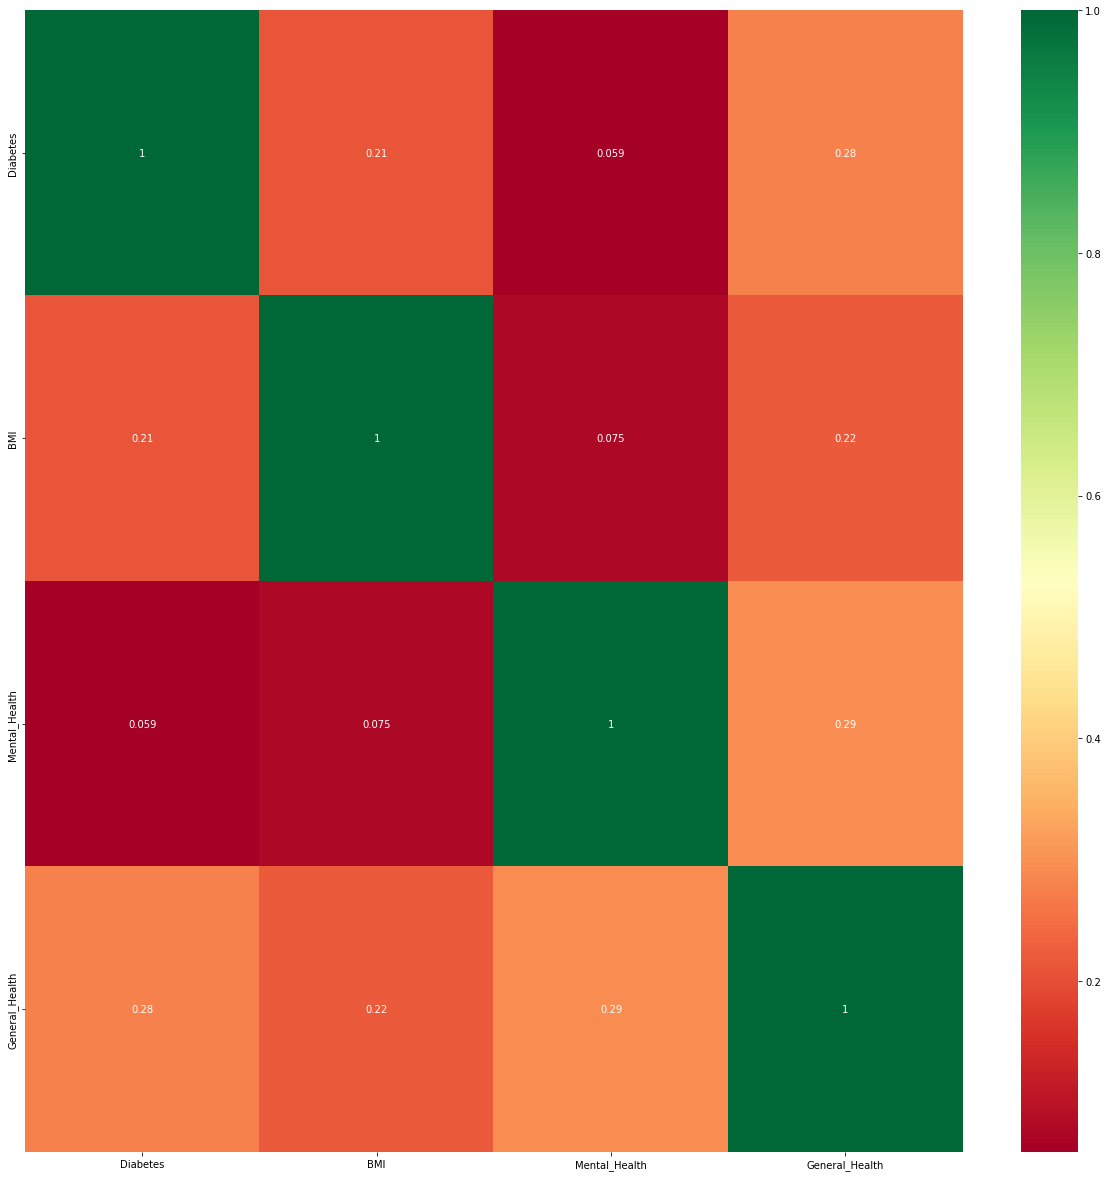

In [ ]:
corrmat = renamed_df_2015.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(21,21))
g=sns.heatmap(renamed_df_2015[top_corr_features].corr(),annot=True,cmap="RdYlGn")
corrmat

From correlation it is clear that probability of diabetes increases with increase in high bp, high bmi, low general health

# Try Univariate Selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# X = final_2015.iloc[:,0:18]  #independent columns
# y = final_2015.iloc[:,-1]    #target column i.e price range

X = renamed_df_2015.iloc[:,1:3]  #independent columns
y = renamed_df_2015['Diabetes']    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


renamed_df_2015.shape

     Specs         Score
1      BMI  3.097554e+06
0  High_BP  5.901165e+03


(405049, 4)

# Try with decision tree feature importance

[0.48225751 0.51774249]


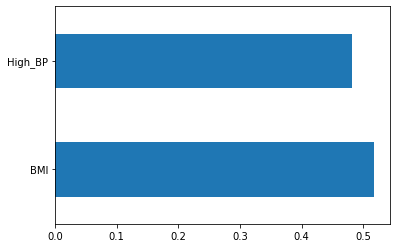

In [ ]:
# data = pd.read_csv("D://Blogs//train.csv")
# X = data.iloc[:,0:20]  #independent columns
# y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# SVM for prediction

In [ ]:
# # Import train_test_split function
# from sklearn.model_selection import train_test_split

# # Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)



# #Import svm model
# from sklearn import svm

# #Create a svm Classifier
# clf = svm.SVC(kernel='linear') # Linear Kernel

# #Train the model using the training sets
# clf.fit(X_train, y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)






# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics

# # Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# # Model Precision: what percentage of positive tuples are labeled as such?
# print("Precision:",metrics.precision_score(y_test, y_pred))

# # Model Recall: what percentage of positive tuples are labelled as such?
# print("Recall:",metrics.recall_score(y_test, y_pred))

# Decision tree

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

X = renamed_df_2015.iloc[:,1:3]  #independent columns
y = renamed_df_2015['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)




print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))




Accuracy: 0.862862367467454
Precision: 0.7969470728116137
Recall: 0.862862367467454


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)




print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))

# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)




print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)



print(classification_report(y_test, y_pred))



# logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test), multi_class='ovr')
# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

# Random Forest

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_depth=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))